In [288]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
import seaborn as sns
from scipy import stats 

In [289]:
df = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [290]:
#Save the 'Id' column
train_ID = df['Id']
test_ID = test_data['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)


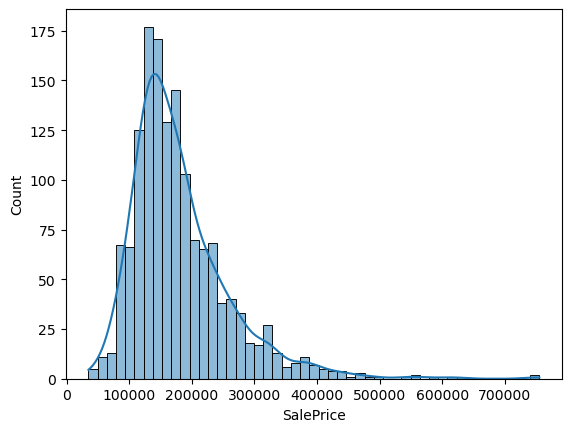

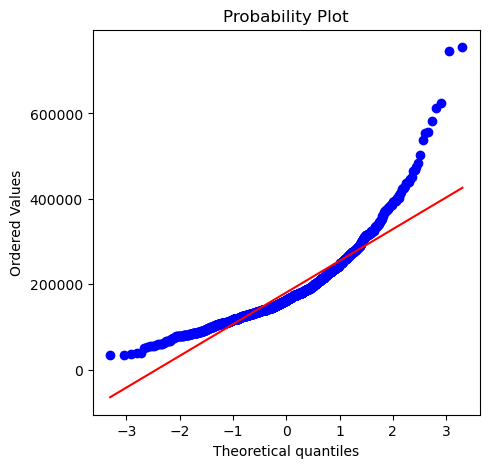

In [291]:
sns.histplot(data=df, x='SalePrice', kde=True)
fig = plt.figure(figsize=(5, 5))
res = stats.probplot(df['SalePrice'], plot=plt)

In [292]:
# log transformation
df['SalePrice'] = np.log(df['SalePrice'])

In [293]:
# connecting the training and testing data
ntrain = df.shape[0]
ntest = test_data.shape[0]
y_train = df.SalePrice.values # saving sale price
all_data = pd.concat((df, test_data)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True) # dropping sale data
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


In [294]:
# Chosen features
features = ['TotalBsmtSF', 'GrLivArea', 'OverallQual', 'GarageCars', 'YearBuilt', 'FullBath']

In [295]:
#missing data
total = all_data.isnull().sum().sort_values(ascending=False)
total.head(20)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
dtype: int64

In [296]:
for col in features:
    all_data[col] = all_data[col].fillna('None')

In [297]:
all_data = pd.get_dummies(all_data[features])

In [298]:
X = all_data[:ntrain]
X_test = all_data[ntrain:]

In [299]:
# Decision Tree Regression
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y_train)
y_pred = regressor.predict(X_test)
# r2_score(X_test, y_pred)

In [300]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred
sub
# sub.to_csv('submission.csv',index=False)

,Id,SalePrice
0,1461,11.603680
1,1462,11.918391
2,1463,12.175613
3,1464,12.106252
4,1465,12.100712
...,...,...
1454,2915,11.482466
1455,2916,11.305168
1456,2917,11.883799
1457,2918,11.445717
